### We need to implement the histogram equalization for the images 

In [62]:
import imageio
import cv2
import numpy as np
from matplotlib import pyplot as plt

def HSI_to_rgb(img):
    h = img[:,:, 0]/255 * 2 * np.pi
    s = img[:,:, 1]/255
    i = img[:,:, 2]/255

    h1 = h < 1/3 * 2 * np.pi
    h2 = (1/3 * 2 * np.pi <= h) & (h < 2/3 * 2 * np.pi)
    h3 = 2/3 * 2 * np.pi <= h    

    r = np.zeros_like(h)
    g = np.zeros_like(h)
    b = np.zeros_like(h)
    h_curr = np.zeros_like(h)

    # case 1
    h_curr[h1] = h[h1]
    b[h1] = i[h1] * (1 - s[h1])
    r[h1] = i[h1] * (1 + (s[h1] * np.cos(h_curr[h1])) / (np.cos(np.pi/3 - h_curr[h1])))
    g[h1] = 3 * i[h1] - (r[h1] + b[h1])

    # case 2    
    h_curr[h2] = h[h2] - (2/3 * np.pi)
    r[h2] = i[h2] * (1 - s[h2])
    g[h2] = i[h2] * (1 + (s[h2] * np.cos(h_curr[h2])) / (np.cos(np.pi/3 - h_curr[h2])))
    b[h2] = 3 * i[h2] - (r[h2] + g[h2])

    # case 3
    h_curr[h3] = h[h3] - (4/3 * np.pi)
    g[h3] = i[h3] * (1 - s[h3])
    b[h3] = i[h3] * (1 + (s[h3] * np.cos(h_curr[h3])) / (np.cos(np.pi/3 - h_curr[h3])))
    r[h3] = 3 * i[h3] - (g[h3] + b[h3])

    partial = np.stack((r,g,b),axis=2)
    return np.uint8(partial * 255)

def rgb_to_HSI(img):

    with np.errstate(divide="ignore", invalid="ignore"):

        # load image with 32 floating point type
        rgb = np.float32(img)/255.0

        # Separating RGB    
        r = rgb[:,:,0]
        g = rgb[:,:,1]
        b = rgb[:,:,2]        

        # Intensity
        intensity = (r+b+g)/3

        # Saturation
        min = np.minimum(np.minimum(r,g),b)
        sat = 1 - ((3/(r+g+b+0.0000001))*min)

        # Hue
        hue = np.arccos((0.5*((r-g)+(r-b)))/((np.sqrt((r-g)**2+(r-b)*(g-b)))))
        hue[b>g] = 2*np.pi - hue[b>g]        

        hue_norm = np.uint8((hue / 2 * np.pi) * 255)
        sat_norm = np.uint8(sat * 255)
        intensity_norm = np.uint8(intensity * 255)

        return np.stack((hue_norm,sat_norm,intensity_norm),axis=2)                


def read_img(img_path):
    return imageio.v3.imread(img_path)



In [65]:
import imageio
import cv2
import numpy as np
from matplotlib import pyplot as plt

def HSI_to_rgb(img):
    h = img[:,:, 0]
    s = img[:,:, 1]
    i = img[:,:, 2]

    h1 = h < 1/3 * 2 * np.pi
    h2 = (1/3 * 2 * np.pi <= h) & (h < 2/3 * 2 * np.pi)
    h3 = 2/3 * 2 * np.pi <= h    

    r = np.zeros_like(h)
    g = np.zeros_like(h)
    b = np.zeros_like(h)
    h_curr = np.zeros_like(h)

    # case 1
    h_curr[h1] = h[h1]
    b[h1] = i[h1] * (1 - s[h1])
    r[h1] = i[h1] * (1 + (s[h1] * np.cos(h_curr[h1])) / (np.cos(np.pi/3 - h_curr[h1])))
    g[h1] = 3 * i[h1] - (r[h1] + b[h1])

    # case 2    
    h_curr[h2] = h[h2] - (2/3 * np.pi)
    r[h2] = i[h2] * (1 - s[h2])
    g[h2] = i[h2] * (1 + (s[h2] * np.cos(h_curr[h2])) / (np.cos(np.pi/3 - h_curr[h2])))
    b[h2] = 3 * i[h2] - (r[h2] + g[h2])

    # case 3
    h_curr[h3] = h[h3] - (4/3 * np.pi)
    g[h3] = i[h3] * (1 - s[h3])
    b[h3] = i[h3] * (1 + (s[h3] * np.cos(h_curr[h3])) / (np.cos(np.pi/3 - h_curr[h3])))
    r[h3] = 3 * i[h3] - (g[h3] + b[h3])
    
    return np.stack((r,g,b),axis=2)

def rgb_to_HSI(img):

    with np.errstate(divide="ignore", invalid="ignore"):

        # load image with 32 floating point type
        rgb = np.float32(img)/255.0

        # Separating RGB    
        r = rgb[:,:,0]
        g = rgb[:,:,1]
        b = rgb[:,:,2]        

        # Intensity
        intensity = (r+b+g)/3

        # Saturation
        min = np.minimum(np.minimum(r,g),b)
        sat = 1 - ((3/(r+g+b+0.0000001))*min)

        # Hue
        hue = np.arccos((0.5*((r-g)+(r-b)))/((np.sqrt((r-g)**2+(r-b)*(g-b)))))
        hue[b>g] = 2*np.pi - hue[b>g]        

        return np.stack((hue,sat,intensity),axis=2)                


def read_img(img_path):
    return imageio.v3.imread(img_path)



In [90]:
#img_path = "../../../images/used_images/light_dark/"
#img_name = "DSC_0015.jpg"
img_path = "./"

img_name = "lenna.png"

img_rgb = read_img(img_path+img_name)
print("Image Shape: ", img_rgb.shape)

# Converting RGB to HSI
img_hsi = rgb_to_HSI(img_rgb)

img_hsi_norm = np.zeros(shape=(img_hsi.shape), dtype=np.uint8)
img_hsi_norm[:,:,0] = np.uint8((img_hsi[:,:,0] / (2 * np.pi)) * 255)
img_hsi_norm[:,:,1] = np.uint8(img_hsi[:,:,1] * 255)
img_hsi_norm[:,:,2] = np.uint8(img_hsi[:,:,2] * 255)

print(max(img_hsi_norm.flatten()))

# Converting back to RGB
img_back_rgb = HSI_to_rgb(img_hsi)
img_back_rgb_norm = img_back_rgb.copy()
img_back_rgb_norm = np.uint8(img_back_rgb_norm * 255)

Image Shape:  (330, 330, 3)
255


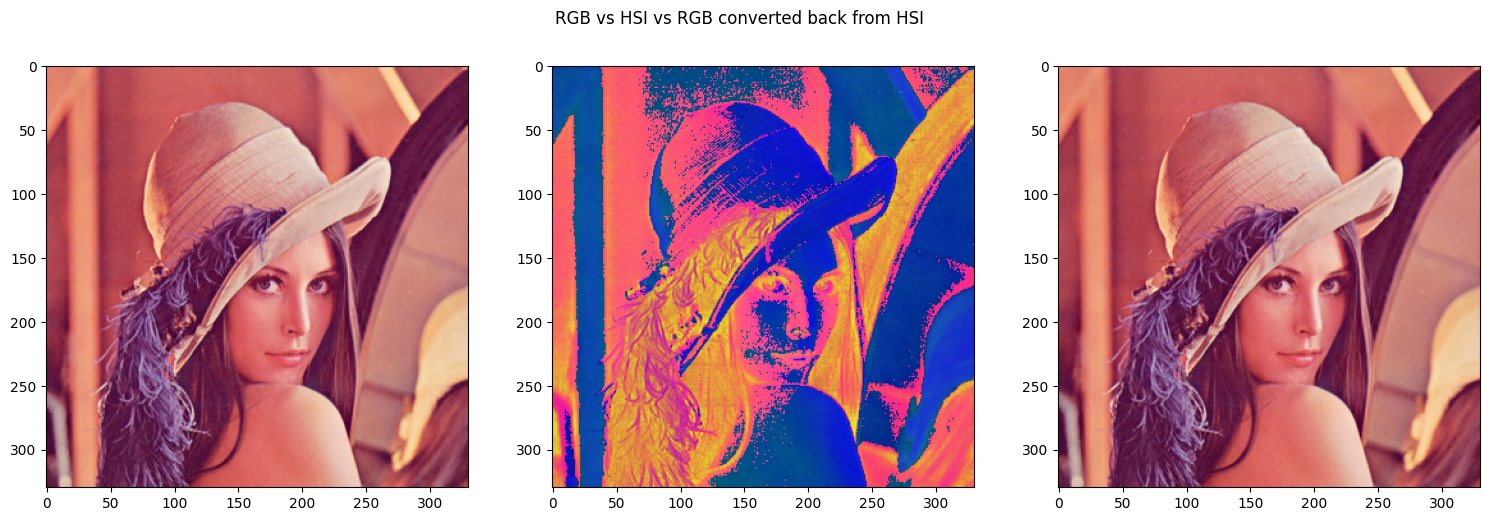

In [91]:
fig, axs = plt.subplots(1, 3)

axs[0].imshow(img_rgb)
axs[1].imshow(img_hsi_norm)
axs[2].imshow(img_back_rgb_norm)
fig.suptitle('RGB vs HSI vs RGB converted back from HSI')
fig.set_size_inches(18.5, 5.5)
plt.show()

In [92]:
def create_histogram_rgb(img=None):        
    fig, axs = plt.subplots(1, 2)
    fig.suptitle('RGB Histogram and corresponding image')
    fig.set_size_inches(18.5, 5.5)

    color = ('red','green','blue')
    for i,col in enumerate(color):
        #histr = cv2.calcHist([img],[i],None,[256],[0,256])
        #axs[0].plot(histr, color = col)                
        axs[0].hist(img[:,:,i].ravel(),256,[0,256], color = col)
    axs[1].imshow(img)
    plt.show()

def create_histogram_hsi(img_hsi):

    fig, axs = plt.subplots(1, 2)
    fig.suptitle('Intensity Histogram in HSI color space and corresponding image')
    fig.set_size_inches(18.5, 5.5)

    #histr = cv2.calcHist([img_hsi],[2],None,[256],[0,1])
    #axs[0].plot(histr)    
    axs[0].hist(img_hsi[:,:,2].ravel(),256,[0,1])
    axs[1].imshow(img_hsi)
    plt.plot()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


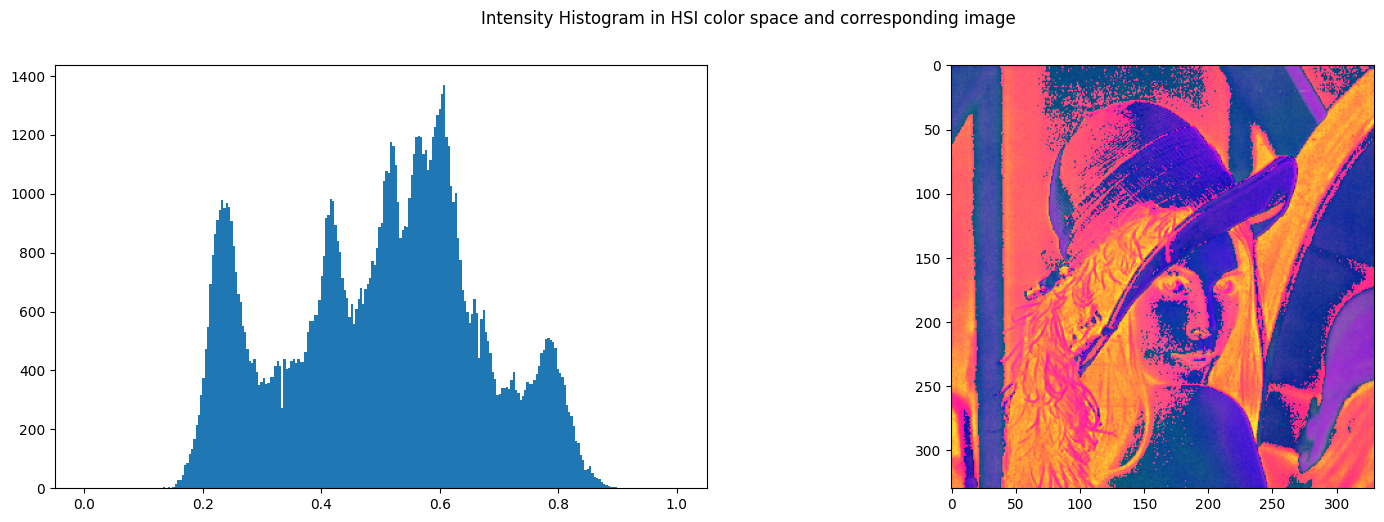

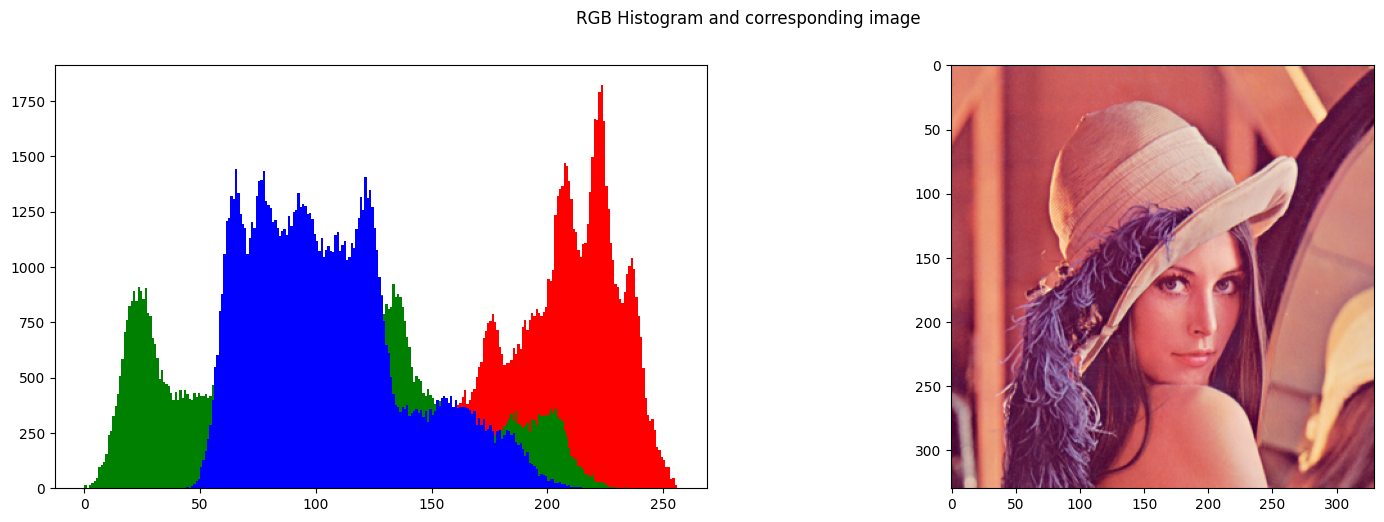

In [93]:
# Creating the histogram for intensity channel
create_histogram_hsi(img_hsi)

# Creating the histogram for every channel
create_histogram_rgb(img_rgb)

### Equalization on HSI

The idea of equalization is to make the above histogram similar to a uniform distribution

In [94]:
img_hsi_equalized = img_hsi.copy()
src_8 = np.uint8(img_hsi_equalized[:,:,2]*255)
dst = cv2.equalizeHist(src_8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


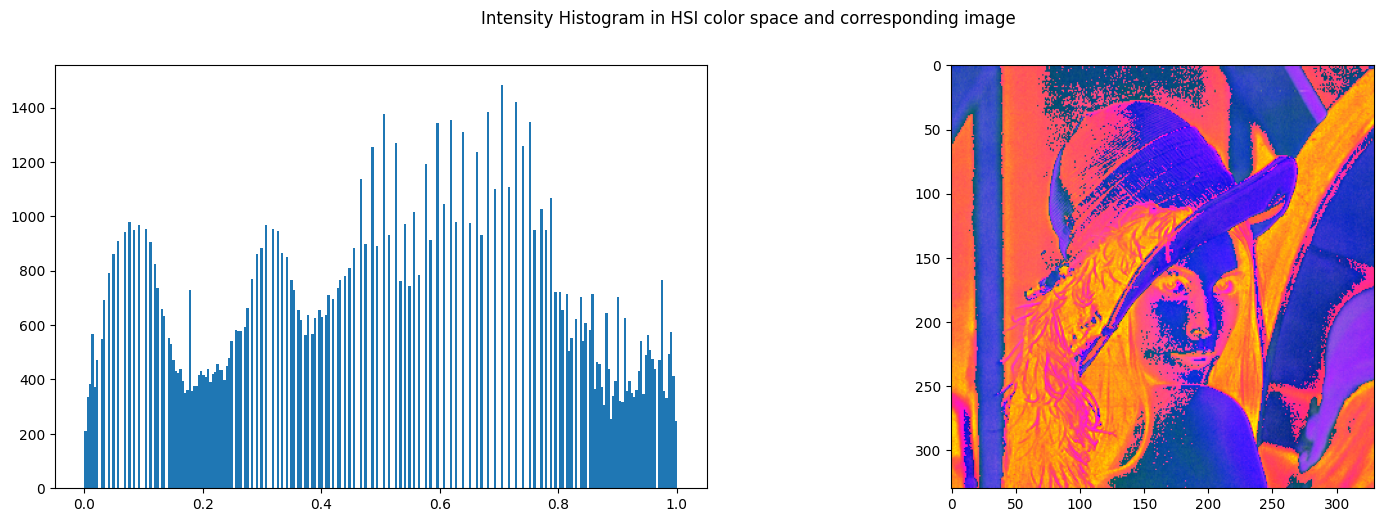

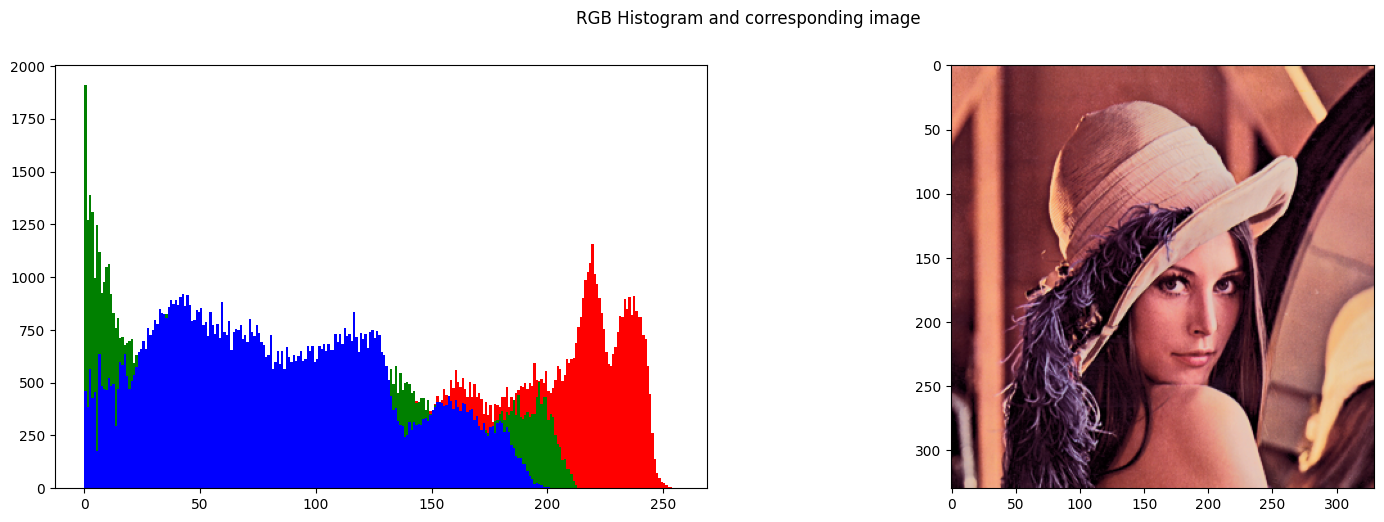

In [95]:
img_hsi_equalized[:,:,2] = np.float32(dst/255)

create_histogram_hsi(img_hsi_equalized)

new_img = HSI_to_rgb(img_hsi_equalized)
new_img_8 = np.uint8(new_img*255/np.max(new_img.flatten())) # clip the values to 0 to 255

create_histogram_rgb(new_img_8)

In [96]:
def compare(img1, img2, titles):
    res = np.hstack((img1,img2)) #stacking images side-by-side
    plt.figure(figsize=(20,10))
    plt.title('{} vs {}'.format(titles[0],titles[1]))
    plt.imshow(res,cmap='gray')

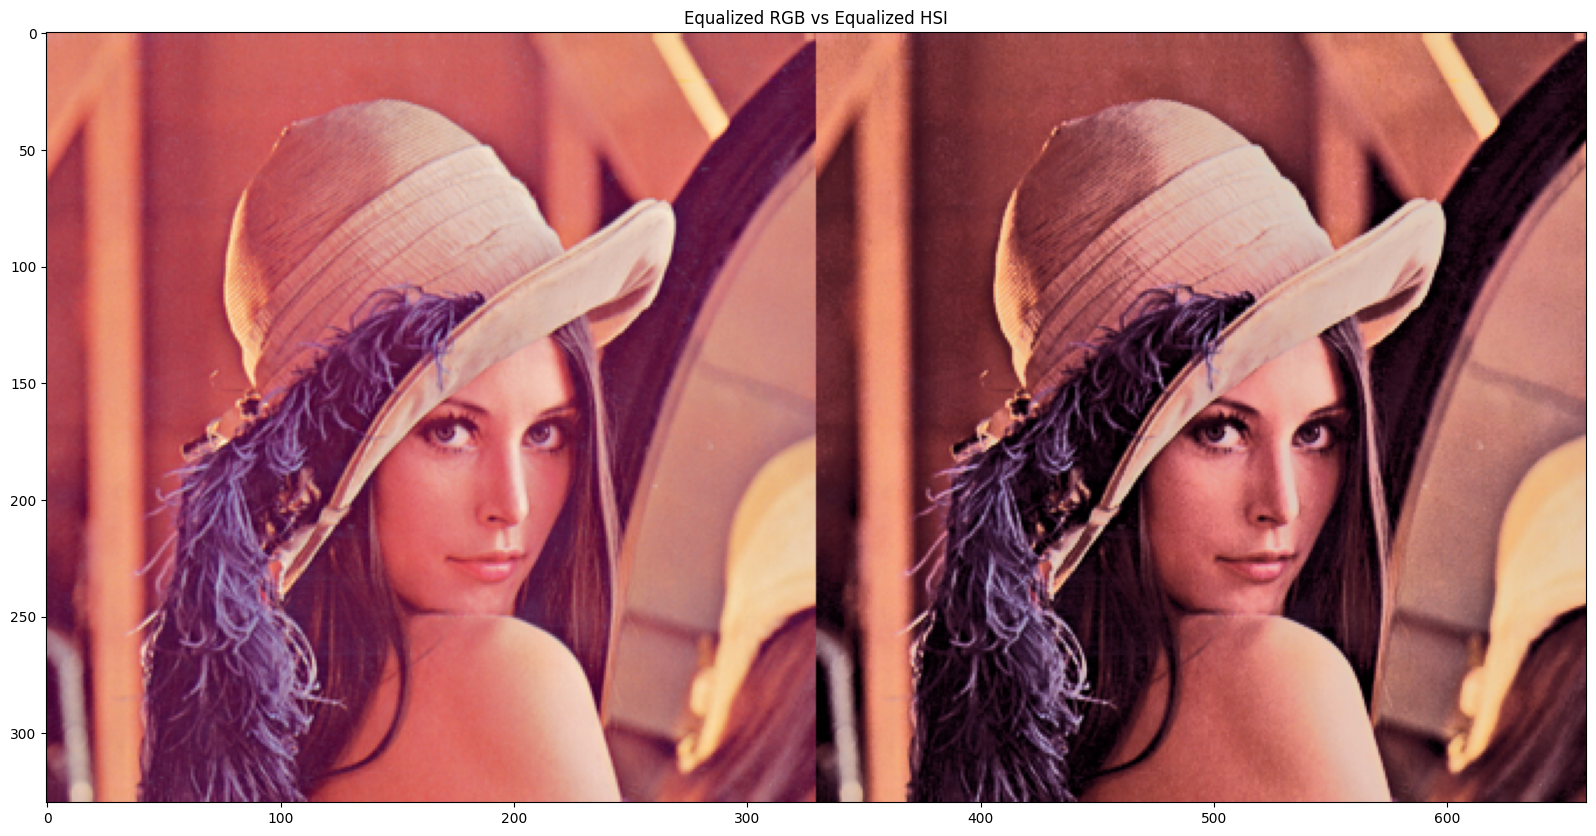

In [97]:
compare(img_rgb, new_img_8, ["Equalized RGB", "Equalized HSI"])

# Contrast stretching - Gamma


In [10]:
def gamma(img, gamma):    
    return np.power(img, 1/gamma)

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)

In [11]:
img_rgb_gamma = img_rgb.copy()/255

gamma05 = gammaCorrection(img_rgb, 0.5)
gamma15 = gammaCorrection(img_rgb, 1.5)

#print(max(test.flatten()))


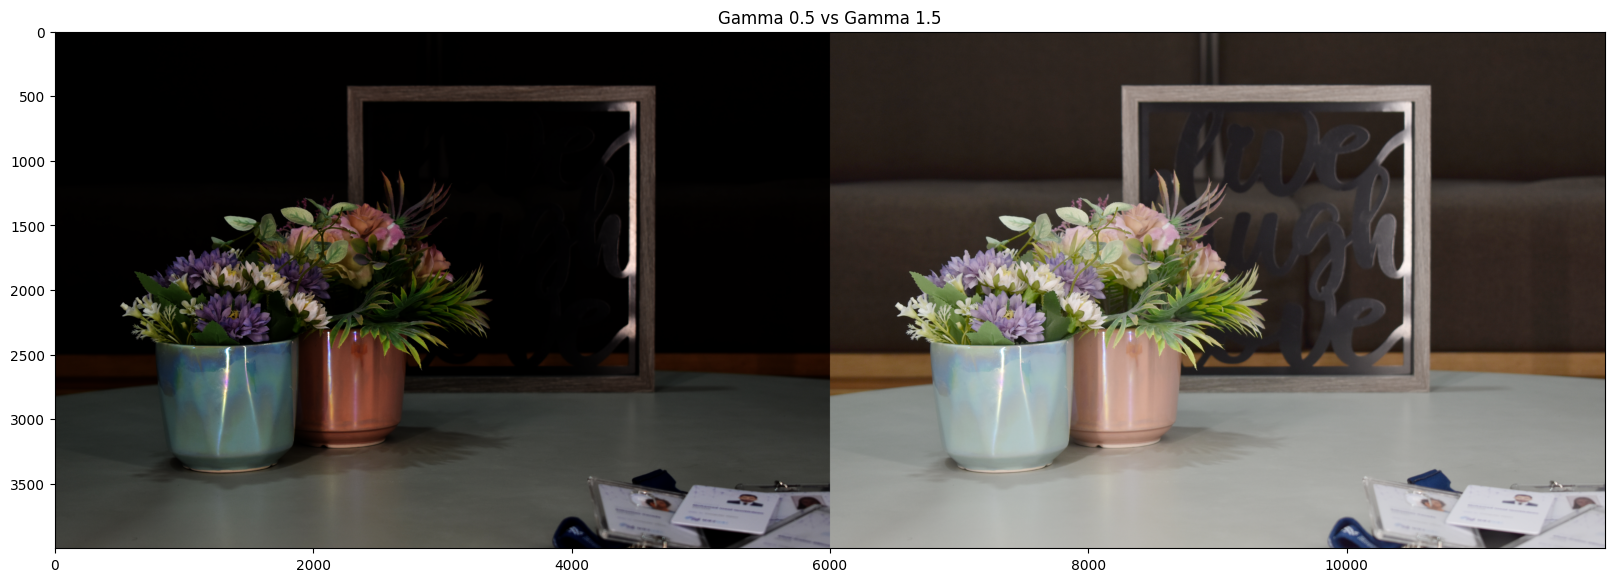

In [12]:
compare(gamma05, gamma15, ["Gamma 0.5", "Gamma 1.5"])

## Contrast Stretching - alpha & beta

In [16]:
img_rgb_ab = img_rgb.copy()/255

alpha = 1.5
beta = 0.5
new_img_a = np.clip(alpha*img_rgb_ab + beta, 0, 1)

img_rgb_ab = img_rgb.copy()/255

alpha = 0.5
beta = 0.05
new_img_b = np.clip(alpha*img_rgb_ab + beta, 0, 1)


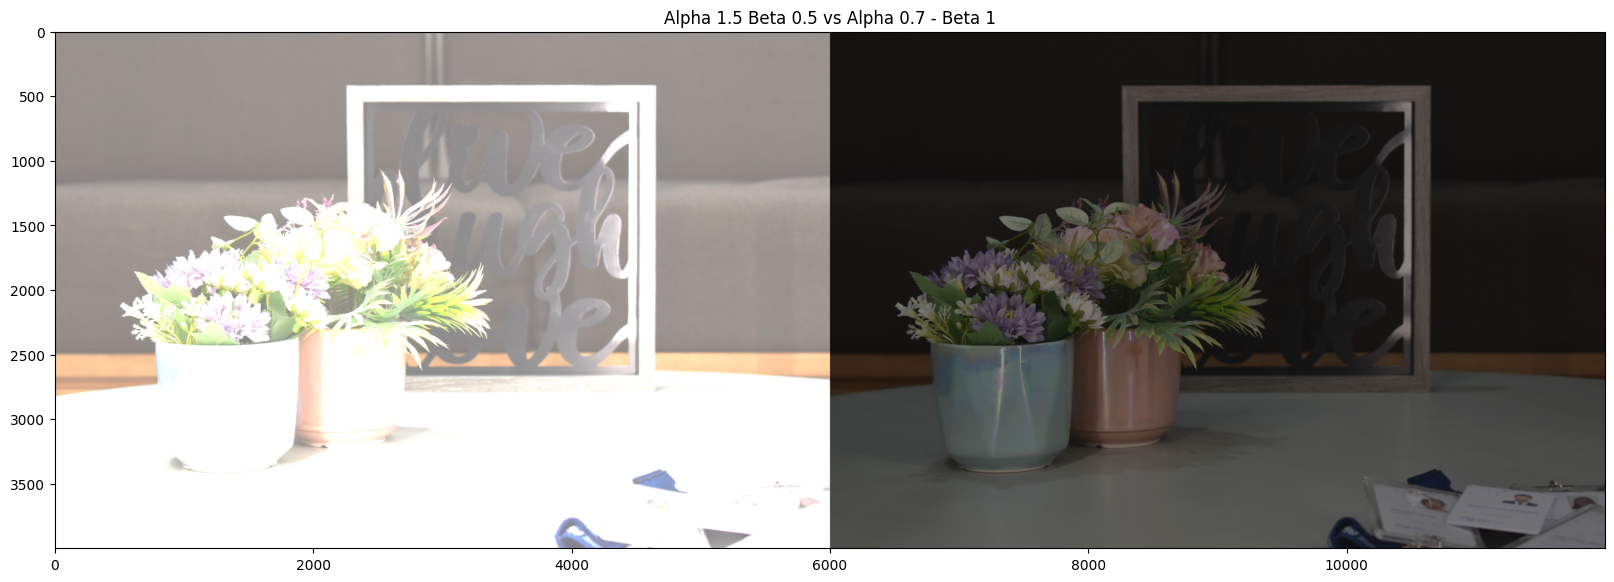

In [17]:
compare(new_img_a, new_img_b, ["Alpha 1.5 Beta 0.5", "Alpha 0.7 - Beta 1"])